In [1]:
suppressMessages(require(data.table))
suppressMessages(require(gplots))
suppressMessages(require(matrixStats))
suppressMessages(require(RColorBrewer))
require(igraph)

Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
load("180505_TPMandRUVscale_1k.Rdata")

In [3]:
ls()

[1] "BCR_annoation"    "BCR_annoation_w"  "cell_assignment"  "ExpressionMat"   
[5] "ExpressionNormed" "pca_allcell"      "rtsne_allcell"    "TCR_annoation"   
[9] "TCR_annoation_w"

In [2]:
load("180505_DistLouvain.Rdata")

In [ ]:
louvain_out=louvain(dist(ExpressionNormed), 1)

In [3]:
ls()

[1] "dist_Exp"

In [4]:
var()

[1] 0.01639353

In [17]:
tag_col=order(colSds(ExpressionMat),decreasing = T)
dimmax=10000
vars=rep(0,dimmax)
sums=rep(0,nrow(ExpressionMat))
vars[1]=var(ExpressionMat[,tag_col[1]])
for(i in 2:dimmax){
    sums=sums+ExpressionMat[,tag_col[i]]^2
    vars[i]=var(sums^0.5)
}

In [27]:
tag_col=order(colSds(ExpressionMat),decreasing = T)
dimvec=round(10^seq(1,4,length.out = 12))
tag_cell=sample(1:nrow(ExpressionMat),2000)
DistMat_list=list()
dmax=rep(0,length(dimvec))
dmin=rep(0,length(dimvec))
DistMat_list[[1]]=as.matrix(dist(ExpressionMat[tag_cell,tag_col[1]]))
dmax[1]=max(DistMat_list[[1]])
dmin[1]=min(DistMat_list[[1]])
for(i in 2:length(dimvec)){
    DistMat_list[[i]]=(DistMat_list[[i-1]]^2+as.matrix(dist(ExpressionMat[tag_cell,tag_col[(dimvec[i-1]+1):dimvec[i]]]))^2)^0.5
    dmax[i]=max(DistMat_list[[i]],na.rm = T)
    diag(DistMat_list[[i]])=NA
    dmin[i]=min(DistMat_list[[i]],na.rm = T)
}

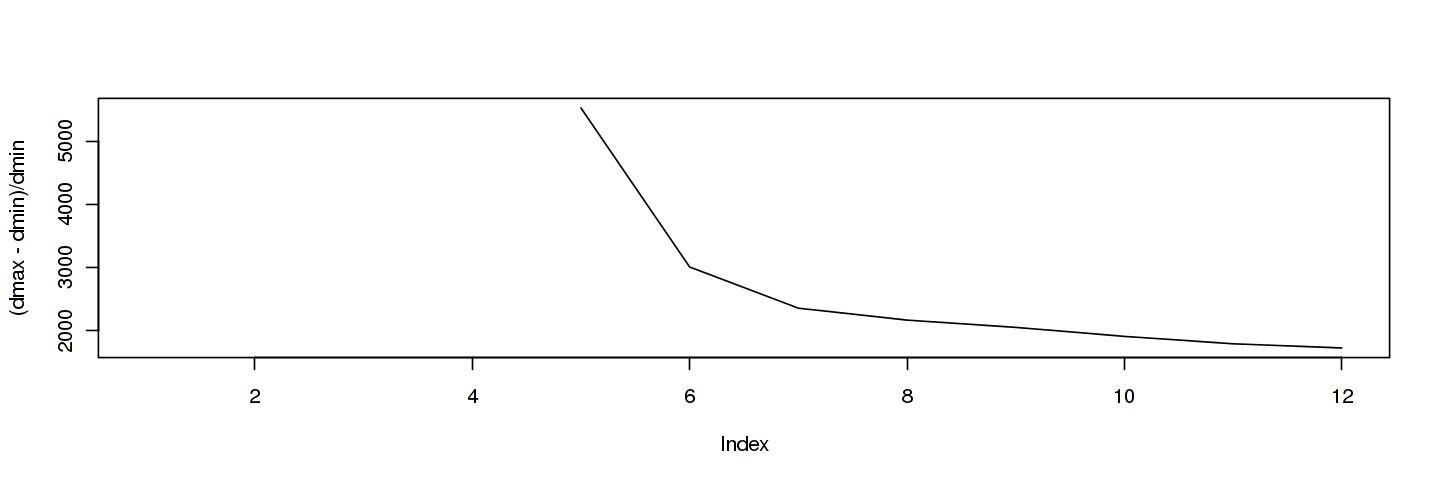

In [37]:
require(repr)
options(repr.plot.width=12, repr.plot.height=4)
plot((dmax-dmin)/dmin,type="l")

In [36]:
dmin

[1] 0.000000 0.000000 0.000000 0.000000 2.828427 5.196152 6.633250 7.211103
 [9] 7.615773 8.185353 8.717798 9.055385

In [22]:
dmax
dmin

[1] 10.00000 65.79514       NA       NA       NA       NA       NA       NA
 [9]       NA       NA

[1] 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 1.414214 2.236068
 [9] 3.872983 5.830952